# Libraries and functions 

In [1]:
from pytadbit.modelling.structuralmodels import StructuralModels,load_structuralmodels
import cPickle as pickle
import sys

# Parameters to modify 

In [2]:
# Base path where the folder branch is stored
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'
# Maximum number of models to be used. From ~1500 done, we will keep the best 1000
modelsKeep = 1000

# Run 

## Import additional libraries 

In [3]:
sys.path.append(basePath + 'code')
import fileHandling

## Get model files

In [4]:
## Path were the models are stored
cells, regionsAll, models = fileHandling.getModelsPaths(basePath, ending='models')
                
## get regions
regiones = {}
# get info of the regions
for cell in cells:
    for regi in regionsAll:
        if not regi in regiones:
            
            regiones[regi] = fileHandling.getREgiInfo(basePath, regi, cell)
        else:
            infot = fileHandling.getREgiInfo(basePath, regi, cell)
            if infot != regiones[regi]:
                print('Region %s, cell %s has different parameters than previous cells')
                print('This code is not prepared to compare models with different length \
                      or resolution')

## Set needed paths

In [5]:
# Define needed paths and create plots folder
clustersPickle = basePath + 'outData/modelAnalysis/clustering/allClusterDict.pickle'
outplot = basePath + 'outPlot/modelAnalysis/model_comparisons/matrixComp/'
! mkdir -p {outplot}

## Load clustering info 

In [6]:
with open(clustersPickle, "rb") as input_file:
    allClusters = pickle.load(input_file)
print('Recovering previous clustering data from:')
print(clustersPickle)

Recovering previous clustering data from:
/home/julen/TADdyn/TADdyn_tutorial/outData/modelAnalysis/clustering/allClusterDict.pickle


# Get model matrices and Zscore plots not clusterised

In [7]:
saveFig = False

/home/julen/TADdyn/TADdyn_tutorial/models/Ery/b-globin/Ery_b-globin_C200.0L0.0U0.0M300Res5000.models


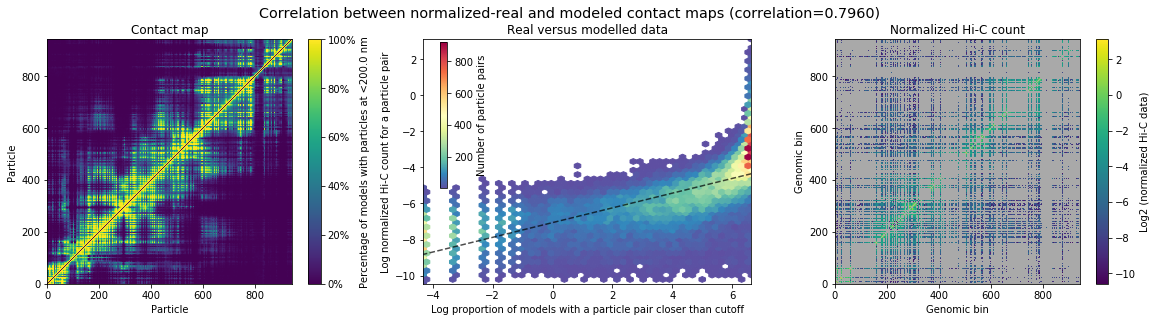

/home/julen/TADdyn/TADdyn_tutorial/models/Mon/b-globin/Mon_b-globin_C200.0L-0.5U0.0M300Res5000.models


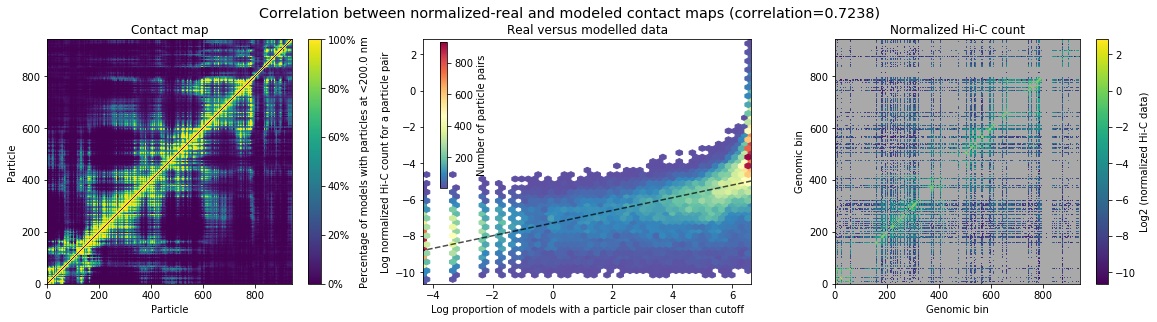

/home/julen/TADdyn/TADdyn_tutorial/models/nCD4/b-globin/nCD4_b-globin_C200.0L0.0U0.0M300Res5000.models


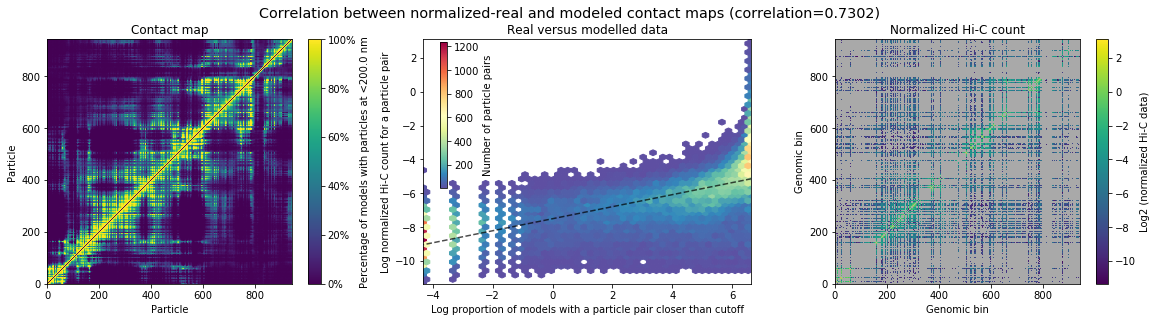

In [8]:
correlationData = {}
for cell in cells:
    correlationData[cell] = {}
    for regi in models[cell]:
        fi = models[cell][regi]
        print(fi)
        mods = load_structuralmodels(fi)
        # keep the amount of selected models
        mods.define_best_models(modelsKeep)
        cutoff = float(fi.split('_C')[-1].split('L')[0])

        # We will avoid showing bad columns (show_bad_columns) because in pcHiC
        # can be most of the matrix
        if saveFig == True:

            tempPath =  outplot + 'modelMatrixCor_%s_%s.pdf' %(cell, regi)
            corTot = mods.correlate_with_real_data(plot=True, cutoff=cutoff, savefig=tempPath,
                                                  show_bad_columns=False)[0]


        else:

            corTot = mods.correlate_with_real_data(plot=True, cutoff=cutoff,
                                                  show_bad_columns=False)[0]

        correlationData[cell][regi] = corTot

In [9]:
print correlationData

{'nCD4': {'b-globin': 0.7302174816323291}, 'Ery': {'b-globin': 0.7959565066944511}, 'Mon': {'b-globin': 0.723846354658185}}
